In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 19.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


# dual approach using 2 yolos, previous finetuned yolov11, and pretrained yolo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 85.9MB/s]



0: 448x640 1 helmet, 2 persons, 1 vest, 284.9ms
Speed: 15.0ms preprocess, 284.9ms inference, 24.9ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 cell phone, 129.0ms
Speed: 4.5ms preprocess, 129.0ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


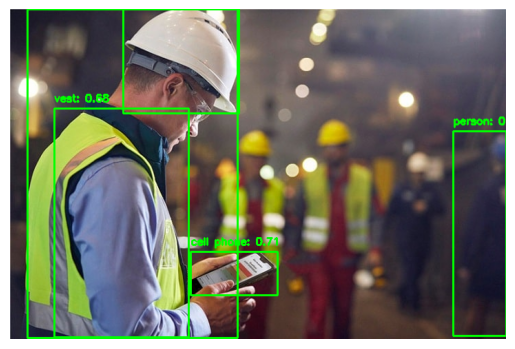

In [2]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model
finetuned_model_path = "/kaggle/input/yolo_best/other/default/1/best.pt"  # Update with your fine-tuned model path
finetuned_model = YOLO(finetuned_model_path)

# Load the pretrained YOLOv11 model for detecting "cell phone"
pretrained_model = YOLO('yolo11n.pt')  # Update if using a different YOLOv11 model path

# Image preprocessing
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Draw bounding boxes and add class names and confidence
def draw_boxes(results, image, class_names=None):
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Get confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Get class indices

        for box, conf, cls_id in zip(boxes, confs, cls_ids):
            x1, y1, x2, y2 = map(int, box)
            # Determine the class name
            if class_names:
                class_name = class_names[int(cls_id)]
            else:
                class_name = "cell phone"  # Only one class for pretrained model inference
            
            label = f"{class_name}: {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Bounding box in green
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Perform dual inference and visualize
def dual_inference(image_path):
    image = preprocess_image(image_path)
    
    # Inference with fine-tuned model (helmet, person, vest)
    finetuned_results = finetuned_model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu")
    finetuned_classes = ['helmet', 'person', 'vest']
    
    # Inference with pretrained model (cell phone)
    pretrained_results = pretrained_model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu", classes=[67])  # 67 is the COCO ID for "cell phone"
    
    # Draw bounding boxes for both results
    draw_boxes(finetuned_results, image, finetuned_classes)
    draw_boxes(pretrained_results, image)
    
    # Show the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/cell-phone-test/construction-trends-mobile-tech.jpeg"  # Update with the path to your image
dual_inference(image_path)

# Yolov11 on cell phones only


0: 640x640 (no detections), 204.8ms
Speed: 4.9ms preprocess, 204.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


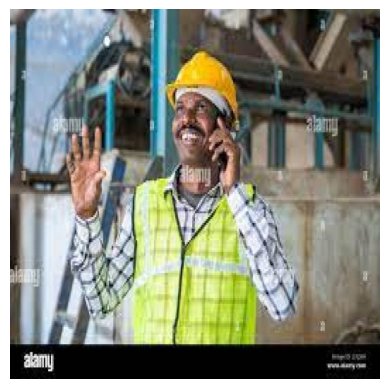

In [3]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the pretrained YOLOv11 model
model = YOLO('yolo11n.pt')  # Update this with the correct path to your YOLOv11 model if needed

# Image preprocessing function
def preprocess_image(image_path):
    # Check if the image exists
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Draw bounding boxes and add class names and confidence
def draw_boxes(results, image):
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Class ids
        
        for box, conf, cls_id in zip(boxes, confs, cls_ids):
            x1, y1, x2, y2 = map(int, box)
            # Get class name based on class id (e.g., 'person' or 'cell phone')
            if cls_id == 67:
                label = f"Cell Phone: {conf:.2f}"
            elif cls_id == 0:
                label = f"Person: {conf:.2f}"
            else:
                label = f"Class {int(cls_id)}: {conf:.2f}"  # For other classes, if applicable
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Bounding box in green
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Perform inference and visualize
def detect_objects(image_path):
    image = preprocess_image(image_path)
    
    if image is None:
        return  # Exit if the image could not be loaded
    
    # Perform inference on both 'cell phone' and 'person' classes (class indices 67 and 0)
    results = model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu", classes=[67, 0])
    
    # Draw bounding boxes
    draw_boxes(results, image)
    
    # Display the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/safety-helmet-and-reflective-jacket/safety-Helmet-Reflective-Jacket/test/images/helmet_jacket_07350.jpg"  # Update with your image path
detect_objects(image_path)


# using new finetuned yolo for all 4 - FAILED


0: 448x640 3 helmets, 1 person, 1 vest, 104.3ms
Speed: 3.4ms preprocess, 104.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


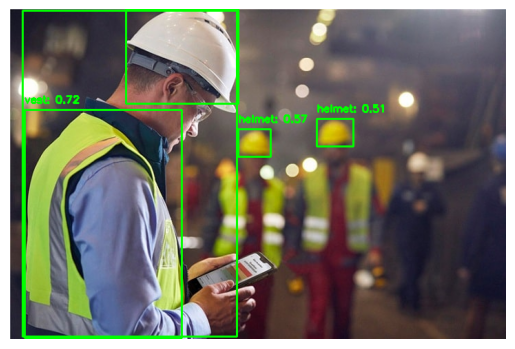

In [4]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned YOLOv11 model
model = YOLO('/kaggle/input/newfinetuned_includingcellphones/other/default/1/best.pt')  # Replace with your fine-tuned model's path

# Class names (you can adjust the order according to your dataset)
class_names = ['helmet', 'person', 'vest', 'cell phone']

# Image preprocessing function
def preprocess_image(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Draw bounding boxes and add class names and confidence
def draw_boxes(results, image):
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Confidence scores
        class_ids = result.boxes.cls.cpu().numpy()  # Class ids
        
        for box, conf, class_id in zip(boxes, confs, class_ids):
            x1, y1, x2, y2 = map(int, box)
            class_name = class_names[int(class_id)]
            label = f"{class_name}: {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Bounding box in green
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Perform inference and visualize
def detect_objects(image_path):
    image = preprocess_image(image_path)
    
    if image is None:
        return  # Exit if the image could not be loaded
    
    # Perform inference on all classes (helmet, person, vest, cell phone)
    results = model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu")
    
    # Draw bounding boxes for all detected objects
    draw_boxes(results, image)
    
    # Display the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/cell-phone-test/construction-trends-mobile-tech.jpeg"  # Update with your image path
detect_objects(image_path)


# finetuning yolov11 on larger dataset for better results + dual normal yolo - BETTER


0: 448x640 5 Safety-Helmets, 3 Reflective-Jackets, 130.4ms
Speed: 3.0ms preprocess, 130.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 persons, 140.7ms
Speed: 3.8ms preprocess, 140.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


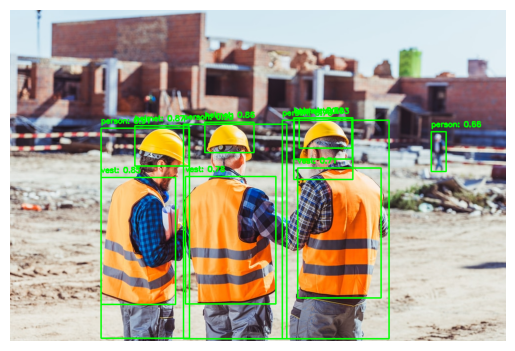

In [13]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model (detects helmet and vest)
finetuned_model_path = "/kaggle/input/finetuned_yolo_from_gpu/other/default/1/best.pt"  # Update with your fine-tuned model path
finetuned_model = YOLO(finetuned_model_path)

# Load the pretrained YOLOv11 model (detects person and cell phone)
pretrained_model = YOLO('yolo11n.pt')  # Update if using a different YOLOv11 model path

# Image preprocessing
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Draw bounding boxes and add class names and confidence
def draw_boxes(results, image, class_names=None, custom_labels=None):
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Get confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Get class indices

        for box, conf, cls_id in zip(boxes, confs, cls_ids):
            x1, y1, x2, y2 = map(int, box)
            if custom_labels:  # Handle custom class names (e.g., for pretrained model)
                class_name = custom_labels[cls_id]
            elif class_names:
                class_name = class_names[int(cls_id)]
            else:
                class_name = f"Class {int(cls_id)}"
            
            label = f"{class_name}: {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Bounding box in green
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Perform dual inference and visualize results
def dual_inference(image_path):
    image = preprocess_image(image_path)
    
    # Inference with fine-tuned model (helmet and vest detection)
    finetuned_results = finetuned_model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu")
    finetuned_classes = ['helmet', 'vest']  # Classes for the fine-tuned model
    
    # Inference with pretrained model (detects person and cell phone)
    pretrained_results = pretrained_model.predict(source=image, save=False, device="cuda" if torch.cuda.is_available() else "cpu", classes=[0, 67])
    pretrained_labels = {0: "person", 67: "cell phone"}  # Custom labels for the pretrained model
    
    # Draw bounding boxes for both model results
    draw_boxes(finetuned_results, image, class_names=finetuned_classes)
    draw_boxes(pretrained_results, image, custom_labels=pretrained_labels)
    
    # Display the final image with bounding boxes
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/cell-phone-test/cs.jpg"  # Update with your image path
dual_inference(image_path)


# Math


0: 448x640 6 Safety-Helmets, 3 Reflective-Jackets, 150.2ms
Speed: 6.1ms preprocess, 150.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 persons, 1 cell phone, 138.9ms
Speed: 4.4ms preprocess, 138.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

--- Fine-tuned Model Detections ---
Class: Safety-Helmet, Confidence: 0.90, Coordinates: [     166.27     0.88237      335.44      142.92]
Class: Reflective-Jackets, Confidence: 0.82, Coordinates: [     9.4201      149.58      252.45      477.91]
Class: Safety-Helmet, Confidence: 0.79, Coordinates: [     441.55      155.98      501.63      203.78]
Class: Safety-Helmet, Confidence: 0.76, Coordinates: [     328.47      172.05       381.2      216.37]
Class: Reflective-Jackets, Confidence: 0.70, Coordinates: [     416.68      220.67      531.19      369.26]
Class: Safety-Helmet, Confidence: 0.44, Coordinates: [     359.87      224.68      386.59      249.66]
Class: Safety-Helmet, Confidence: 

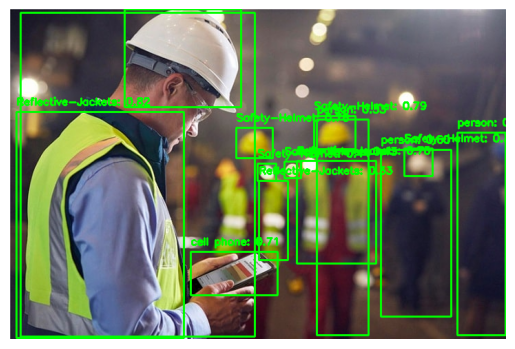

In [8]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model (detects helmet and vest)
finetuned_model_path = "/kaggle/input/finetuned_yolo_from_gpu/other/default/1/best.pt"
finetuned_model = YOLO(finetuned_model_path)

# Load the pretrained YOLOv11 model (detects person and cell phone)
pretrained_model = YOLO('yolo11n.pt')

# Image preprocessing
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Draw bounding boxes and add class names and confidence
def draw_boxes(results, image, class_names=None, custom_labels=None):
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Get confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Get class indices

        for box, conf, cls_id in zip(boxes, confs, cls_ids):
            x1, y1, x2, y2 = map(int, box)
            if custom_labels:  # Handle custom class names (e.g., for pretrained model)
                class_name = custom_labels[cls_id]
            elif class_names:
                class_name = class_names[int(cls_id)]
            else:
                class_name = f"Class {int(cls_id)}"
            
            label = f"{class_name}: {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Bounding box in green
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Function to calculate overlap between two bounding boxes
def calculate_overlap(box1, box2):
    # Calculate intersection area
    x1, y1, x2, y2 = box1
    x1b, y1b, x2b, y2b = box2

    inter_x1 = max(x1, x1b)
    inter_y1 = max(y1, y1b)
    inter_x2 = min(x2, x2b)
    inter_y2 = min(y2, y2b)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

    # Calculate union area
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x2b - x1b) * (y2b - y1b)

    union_area = area1 + area2 - inter_area

    # IoU calculation
    iou = inter_area / union_area if union_area > 0 else 0

    return iou


# Function to check if a box is in a specific percentage of the person's bounding box
def is_in_top_percentage(person_box, box, percentage):
    _, person_y1, _, person_y2 = person_box
    _, y1, _, y2 = box

    # Calculate the top region boundary
    top_boundary = person_y1 + (percentage / 100) * (person_y2 - person_y1)

    # Check if there is overlap between the helmet box and the top region
    return y1 < top_boundary and y2 > person_y1

# Calculate safety score
def calculate_safety_score(person_box, detections, iou_threshold=0):
    safety_score = 0
    for det_box, class_name, _ in detections:  # Unpack the confidence score but ignore it
        iou = calculate_overlap(person_box, det_box)
        print(f"IOU for {class_name} with person: {iou}")  # Log IoU for debugging
        if class_name in ["cell phone", "Safety-Helmet", "Reflective-Jackets"]:
            if iou > iou_threshold:
                print(f"Overlap detected with {class_name} - IOU: {iou}")
                if class_name == "cell phone":
                    print("ss-30")
                    safety_score -= 30
                elif class_name == "Reflective-Jackets" and is_in_top_percentage(person_box, det_box, 80):
                    safety_score += 50
                    print("ss+50")
                elif class_name == "Safety-Helmet" and is_in_top_percentage(person_box, det_box, 70):
                    safety_score += 50
                    print("ss+50")
    return safety_score




# Draw bounding boxes and calculate safety score
def dual_inference(image_path):
    image = preprocess_image(image_path)
    
    # Perform predictions using both models
    finetuned_results = finetuned_model.predict(source=image, save=False)
    pretrained_results = pretrained_model.predict(source=image, save=False, classes=[0, 67])

    finetuned_classes = ['Safety-Helmet', 'Reflective-Jackets']
    pretrained_labels = {0: "person", 67: "cell phone"}
    
    # Gather detections from the fine-tuned model
    # Gather detections from the fine-tuned model
    detections = [
        (box.xyxy.cpu().numpy().flatten(), finetuned_classes[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in finetuned_results
        for box in result.boxes
    ]
    # Print coordinates, confidence, and classes for fine-tuned model detections
    print("\n--- Fine-tuned Model Detections ---")
    for box, class_name, confidence in detections:
        print(f"Class: {class_name}, Confidence: {confidence:.2f}, Coordinates: {box}")
    
    # Gather detections from the pretrained model (both person and cell phone)
    pretrained_detections = [
        (box.xyxy.cpu().numpy().flatten(), pretrained_labels[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in pretrained_results
        for box in result.boxes if int(box.cls.cpu().numpy().item()) in pretrained_labels
    ]
    # Print coordinates, confidence, and classes for pretrained model detections
    print("\n--- Pretrained Model Detections ---")
    for box, class_name, confidence in pretrained_detections:
        print(f"Class: {class_name}, Confidence: {confidence:.2f}, Coordinates: {box}")

    
    # Combine detections from both models
    detections.extend(pretrained_detections)

    # Calculate safety score for each detected person
    # Calculate safety score for each detected person
    for person_box, class_name, confidence in pretrained_detections:
        if class_name == "person":  # Only calculate for persons
            safety_score = calculate_safety_score(person_box, detections)
            print(f"Person detected with Safety Score: {safety_score}")
            # cv2.putText(image, f"Safety Score: {safety_score}", (int(person_box[0]), int(person_box[1]) - 10),
            #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    draw_boxes(finetuned_results, image, class_names=finetuned_classes)
    draw_boxes(pretrained_results, image, custom_labels=pretrained_labels)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/cell-phone-test/construction-trends-mobile-tech.jpeg"
dual_inference(image_path)


0: 448x640 6 Safety-Helmets, 3 Reflective-Jackets, 148.4ms
Speed: 3.0ms preprocess, 148.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 persons, 1 cell phone, 156.5ms
Speed: 3.2ms preprocess, 156.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


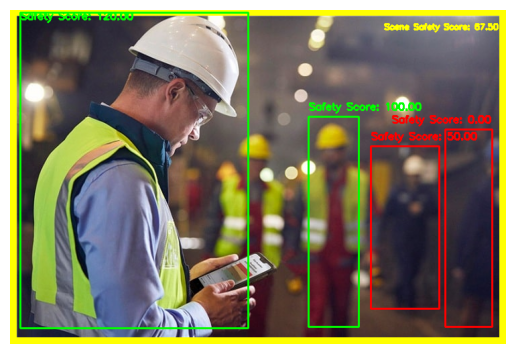

Scene Safety Score: 67.50


In [7]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model (detects helmet and vest)
finetuned_model_path = "/kaggle/input/finetuned_yolo_from_gpu/other/default/1/best.pt"
finetuned_model = YOLO(finetuned_model_path)

# Load the pretrained YOLOv11 model (detects person and cell phone)
pretrained_model = YOLO('yolo11n.pt')

# Image preprocessing
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def draw_boxes(results, image, class_names=None, custom_labels=None, safety_scores=None):
    safety_scores_idx = 0  # Initialize an index to track safety scores for persons
    
    img_width = image.shape[1]  # Image width for boundary checks
    
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Get confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Get class indices

        for idx, (box, conf, cls_id) in enumerate(zip(boxes, confs, cls_ids)):
            x1, y1, x2, y2 = map(int, box)
            if custom_labels:  # Handle custom class names (e.g., for pretrained model)
                class_name = custom_labels[cls_id]
            elif class_names:
                class_name = class_names[int(cls_id)]
            else:
                class_name = f"Class {int(cls_id)}"
            
            label = f"{class_name}: {conf:.2f}"

            # Apply confidence threshold checks here
            if (class_name == "person" and conf < 0.3) or \
               (class_name == "Safety-Helmet" and conf < 0.4) or \
               (class_name == "Reflective-Jackets" and conf < 0.3) or \
               (class_name == "cell phone" and conf < 0.4):
                continue  # Skip drawing this box if the confidence is too low

            if class_name == "person":
                # Ensure there's a valid safety score for this person
                if safety_scores and safety_scores_idx < len(safety_scores):
                    safety_score = safety_scores[safety_scores_idx]
                    safety_scores_idx += 1
                    label = f"Safety Score: {safety_score:.2f}"

                    # Set the bounding box color based on safety score
                    if safety_score >= 90:
                        color = (0, 255, 0)  # Green
                    elif safety_score > 50:
                        color = (255, 255, 0)  # Yellow
                    else:
                        color = (255, 0, 0)  # Red

                # Drawing the box and label with appropriate color
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

                # Adjust the position of the safety score label if it goes off-screen
                label_y_position = y1 - 10
                if label_y_position < 10:  # If the label is going off the top, move it down
                    label_y_position = y1 + 10
                
                # Adjust the position if the label goes off the left or right side
                label_x_position = x1
                label_width = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0][0]
                
                if label_x_position + label_width > img_width:  # If the label goes beyond the right side
                    label_x_position = x2 - label_width  # Move the label to the right side of the box
                
                if label_x_position < 0:  # If the label goes beyond the left side
                    label_x_position = 0  # Move the label to the leftmost side

                # Draw the safety score label at the adjusted position
                cv2.putText(image, label, (label_x_position, label_y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Function to calculate overlap between two bounding boxes
def calculate_overlap(box1, box2):
    # Calculate intersection area
    x1, y1, x2, y2 = box1
    x1b, y1b, x2b, y2b = box2

    inter_x1 = max(x1, x1b)
    inter_y1 = max(y1, y1b)
    inter_x2 = min(x2, x2b)
    inter_y2 = min(y2, y2b)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

    # Calculate union area
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x2b - x1b) * (y2b - y1b)

    union_area = area1 + area2 - inter_area

    # IoU calculation
    iou = inter_area / union_area if union_area > 0 else 0

    return iou

# Function to check if a box is in a specific percentage of the person's bounding box
def is_in_top_percentage(person_box, box, percentage):
    _, person_y1, _, person_y2 = person_box
    _, y1, _, y2 = box

    # Calculate the top region boundary
    top_boundary = person_y1 + (percentage / 100) * (person_y2 - person_y1)

    # Check if there is overlap between the helmet box and the top region
    return y1 < top_boundary and y2 > person_y1

# Calculate safety score
def calculate_safety_score(person_box, detections, iou_threshold=0):
    safety_score = 0
    for det_box, class_name, _ in detections:  # Unpack the confidence score but ignore it
        iou = calculate_overlap(person_box, det_box)
        # print(f"IOU for {class_name} with person: {iou}")  # Log IoU for debugging
        if class_name in ["cell phone", "Safety-Helmet", "Reflective-Jackets"]:
            if iou > iou_threshold:
                # print(f"Overlap detected with {class_name} - IOU: {iou}")
                if class_name == "cell phone":
                    # print("ss-30")
                    safety_score -= 30
                elif class_name == "Reflective-Jackets" and is_in_top_percentage(person_box, det_box, 80):
                    safety_score += 50
                    # print("ss+50")
                elif class_name == "Safety-Helmet" and is_in_top_percentage(person_box, det_box, 70):
                    safety_score += 50
                    # print("ss+50")
    return safety_score

# Draw bounding boxes and calculate safety score
def dual_inference(image_path):
    image = preprocess_image(image_path)
    
    # Perform predictions using both models
    finetuned_results = finetuned_model.predict(source=image, save=False)
    pretrained_results = pretrained_model.predict(source=image, save=False, classes=[0, 67])

    finetuned_classes = ['Safety-Helmet', 'Reflective-Jackets']
    pretrained_labels = {0: "person", 67: "cell phone"}
    
    # Gather detections from the fine-tuned model
    detections = [
        (box.xyxy.cpu().numpy().flatten(), finetuned_classes[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in finetuned_results
        for box in result.boxes
    ]
    
    # Gather detections from the pretrained model (both person and cell phone)
    pretrained_detections = [
        (box.xyxy.cpu().numpy().flatten(), pretrained_labels[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in pretrained_results
        for box in result.boxes if int(box.cls.cpu().numpy().item()) in pretrained_labels
    ]
    
    # Combine detections from both models
    detections.extend(pretrained_detections)

    safety_scores = []
    # Calculate safety score for each detected person
    for person_box, class_name, confidence in pretrained_detections:
        if class_name == "person" and confidence >= 0.3:  # Only calculate for persons with sufficient confidence
            safety_score = calculate_safety_score(person_box, detections)
            safety_scores.append(safety_score)

    # Calculate the mean safety score for the entire scene (if there are any person safety scores)
    if safety_scores:
        scene_safety_score = sum(safety_scores) / len(safety_scores)
    else:
        scene_safety_score = 0.0

    # Set the border color based on the scene safety score
    if scene_safety_score >= 90:
        border_color = (0, 255, 0)  # Green
        safety_label_color = (0, 255, 0)
    elif scene_safety_score > 50:
        border_color = (255, 255, 0)  # Yellow
        safety_label_color = (255, 255, 0)
    else:
        border_color = (255, 0, 0)  # Red
        safety_label_color = (255, 0, 0)

    # Add border to the image
    image_with_border = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=border_color)

    # Draw boxes and safety score on the image
    draw_boxes(finetuned_results, image_with_border, class_names=finetuned_classes, safety_scores=safety_scores)
    draw_boxes(pretrained_results, image_with_border, custom_labels=pretrained_labels, safety_scores=safety_scores)
    
    # Display scene safety score in the top-right corner
    text = f"Scene Safety Score: {scene_safety_score:.2f}"
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 2)[0]  # Set the font scale to 0.4
    text_width = text_size[0]
    text_height = text_size[1]
    
    # Calculate the position of the text to ensure it stays in the top-right corner
    x_pos = image_with_border.shape[1] - text_width - 10  # 10px from the right edge
    y_pos = 30  # Fixed position at the top of the image
    
    # Ensure the text stays within the top-right corner
    if x_pos < 0:
        x_pos = image_with_border.shape[1] - text_width - 20  # Adjust left if text overflows
    
    cv2.putText(image_with_border, text, (x_pos, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.4, safety_label_color, 2)

    # Display the image
    plt.imshow(image_with_border)
    plt.axis('off')
    plt.show()

    return scene_safety_score

# Example usage
image_path = "/kaggle/input/cell-phone-test/construction-trends-mobile-tech.jpeg"  # Replace with your image path
safety_score = dual_inference(image_path)
print(f"Scene Safety Score: {safety_score:.2f}")

# my video code


0: 448x640 6 Safety-Helmets, 3 Reflective-Jackets, 147.1ms
Speed: 6.3ms preprocess, 147.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 persons, 1 cell phone, 142.4ms
Speed: 4.0ms preprocess, 142.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Scene Safety Score: 67.50


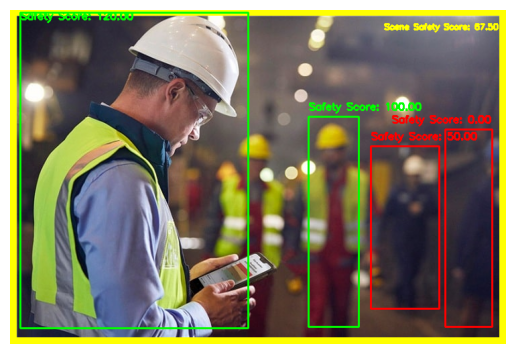

In [6]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the fine-tuned model (detects helmet and vest)
finetuned_model_path = "/kaggle/input/finetuned_yolo_from_gpu/other/default/1/best.pt"
finetuned_model = YOLO(finetuned_model_path)

# Load the pretrained YOLOv11 model (detects person and cell phone)
pretrained_model = YOLO('yolo11n.pt')

# Image preprocessing
def preprocess_image(image_input):
    """
    Preprocesses the input for model prediction.
    If the input is a file path, it reads and converts the image.
    If the input is an image array, it assumes the image is already in the correct format.
    """
    if isinstance(image_input, str):
        img = cv2.imread(image_input)
        if img is None:
            raise ValueError(f"Failed to load image from path: {image_input}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif isinstance(image_input, np.ndarray):
        img = cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB)
    else:
        raise TypeError("Input must be a file path (str) or an image array (np.ndarray).")
    return img


def draw_boxes(results, image, class_names=None, custom_labels=None, safety_scores=None):
    safety_scores_idx = 0  # Initialize an index to track safety scores for persons
    
    img_width = image.shape[1]  # Image width for boundary checks
    
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates (x1, y1, x2, y2)
        confs = result.boxes.conf.cpu().numpy()  # Get confidence scores
        cls_ids = result.boxes.cls.cpu().numpy()  # Get class indices

        for idx, (box, conf, cls_id) in enumerate(zip(boxes, confs, cls_ids)):
            x1, y1, x2, y2 = map(int, box)
            if custom_labels:  # Handle custom class names (e.g., for pretrained model)
                class_name = custom_labels[cls_id]
            elif class_names:
                class_name = class_names[int(cls_id)]
            else:
                class_name = f"Class {int(cls_id)}"
            
            label = f"{class_name}: {conf:.2f}"

            # Apply confidence threshold checks here
            if (class_name == "person" and conf < 0.3) or \
               (class_name == "Safety-Helmet" and conf < 0.4) or \
               (class_name == "Reflective-Jackets" and conf < 0.3) or \
               (class_name == "cell phone" and conf < 0.4):
                continue  # Skip drawing this box if the confidence is too low

            if class_name == "person":
                # Ensure there's a valid safety score for this person
                if safety_scores and safety_scores_idx < len(safety_scores):
                    safety_score = safety_scores[safety_scores_idx]
                    safety_scores_idx += 1
                    label = f"Safety Score: {safety_score:.2f}"

                    # Set the bounding box color based on safety score
                    if safety_score >= 90:
                        color = (0, 255, 0)  # Green
                    elif safety_score > 50:
                        color = (255, 255, 0)  # Yellow
                    else:
                        color = (255, 0, 0)  # Red

                # Drawing the box and label with appropriate color
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

                # Adjust the position of the safety score label if it goes off-screen
                label_y_position = y1 - 10
                if label_y_position < 10:  # If the label is going off the top, move it down
                    label_y_position = y1 + 10
                
                # Adjust the position if the label goes off the left or right side
                label_x_position = x1
                label_width = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0][0]
                
                if label_x_position + label_width > img_width:  # If the label goes beyond the right side
                    label_x_position = x2 - label_width  # Move the label to the right side of the box
                
                if label_x_position < 0:  # If the label goes beyond the left side
                    label_x_position = 0  # Move the label to the leftmost side

                # Draw the safety score label at the adjusted position
                cv2.putText(image, label, (label_x_position, label_y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Function to calculate overlap between two bounding boxes
def calculate_overlap(box1, box2):
    # Calculate intersection area
    x1, y1, x2, y2 = box1
    x1b, y1b, x2b, y2b = box2

    inter_x1 = max(x1, x1b)
    inter_y1 = max(y1, y1b)
    inter_x2 = min(x2, x2b)
    inter_y2 = min(y2, y2b)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

    # Calculate union area
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x2b - x1b) * (y2b - y1b)

    union_area = area1 + area2 - inter_area

    # IoU calculation
    iou = inter_area / union_area if union_area > 0 else 0

    return iou

# Function to check if a box is in a specific percentage of the person's bounding box
def is_in_top_percentage(person_box, box, percentage):
    _, person_y1, _, person_y2 = person_box
    _, y1, _, y2 = box

    # Calculate the top region boundary
    top_boundary = person_y1 + (percentage / 100) * (person_y2 - person_y1)

    # Check if there is overlap between the helmet box and the top region
    return y1 < top_boundary and y2 > person_y1

# Calculate safety score
def calculate_safety_score(person_box, detections, iou_threshold=0):
    safety_score = 0
    for det_box, class_name, _ in detections:  # Unpack the confidence score but ignore it
        iou = calculate_overlap(person_box, det_box)
        # print(f"IOU for {class_name} with person: {iou}")  # Log IoU for debugging
        if class_name in ["cell phone", "Safety-Helmet", "Reflective-Jackets"]:
            if iou > iou_threshold:
                # print(f"Overlap detected with {class_name} - IOU: {iou}")
                if class_name == "cell phone":
                    # print("ss-30")
                    safety_score -= 30
                elif class_name == "Reflective-Jackets" and is_in_top_percentage(person_box, det_box, 80):
                    safety_score += 50
                    # print("ss+50")
                elif class_name == "Safety-Helmet" and is_in_top_percentage(person_box, det_box, 70):
                    safety_score += 50
                    # print("ss+50")
    return safety_score

# Draw bounding boxes and calculate safety score
def dual_inference(image_input):
    """
    Perform dual model inference on the input image, which can be an image array or a file path.
    """
    image = preprocess_image(image_input)
    
    # Perform predictions using both models
    finetuned_results = finetuned_model.predict(source=image, save=False)
    pretrained_results = pretrained_model.predict(source=image, save=False, classes=[0, 67])

    finetuned_classes = ['Safety-Helmet', 'Reflective-Jackets']
    pretrained_labels = {0: "person", 67: "cell phone"}
    
    # Gather detections from the fine-tuned model
    detections = [
        (box.xyxy.cpu().numpy().flatten(), finetuned_classes[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in finetuned_results
        for box in result.boxes
    ]
    
    # Gather detections from the pretrained model (both person and cell phone)
    pretrained_detections = [
        (box.xyxy.cpu().numpy().flatten(), pretrained_labels[int(box.cls.cpu().numpy().item())], box.conf.cpu().item())
        for result in pretrained_results
        for box in result.boxes if int(box.cls.cpu().numpy().item()) in pretrained_labels
    ]
    
    # Combine detections from both models
    detections.extend(pretrained_detections)

    safety_scores = []
    # Calculate safety score for each detected person
    for person_box, class_name, confidence in pretrained_detections:
        if class_name == "person" and confidence >= 0.3:  # Only calculate for persons with sufficient confidence
            safety_score = calculate_safety_score(person_box, detections)
            safety_scores.append(safety_score)

    # Calculate the mean safety score for the entire scene (if there are any person safety scores)
    if safety_scores:
        scene_safety_score = sum(safety_scores) / len(safety_scores)
    else:
        scene_safety_score = 0.0

    # Set the border color based on the scene safety score
    if scene_safety_score >= 90:
        border_color = (0, 255, 0)  # Green
        safety_label_color = (0, 255, 0)
    elif scene_safety_score > 50:
        border_color = (255, 255, 0)  # Yellow
        safety_label_color = (255, 255, 0)
    else:
        border_color = (255, 0, 0)  # Red
        safety_label_color = (255, 0, 0)

    # Add border to the image
    image_with_border = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=border_color)

    # Draw boxes and safety score on the image
    draw_boxes(finetuned_results, image_with_border, class_names=finetuned_classes, safety_scores=safety_scores)
    draw_boxes(pretrained_results, image_with_border, custom_labels=pretrained_labels, safety_scores=safety_scores)
    
    # Display scene safety score in the top-right corner
    text = f"Scene Safety Score: {scene_safety_score:.2f}"
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 2)[0]  # Set the font scale to 0.4
    text_width = text_size[0]
    text_height = text_size[1]
    
    # Calculate the position of the text to ensure it stays in the top-right corner
    x_pos = image_with_border.shape[1] - text_width - 10  # 10px from the right edge
    y_pos = 30  # Fixed position at the top of the image
    
    # Ensure the text stays within the top-right corner
    if x_pos < 0:
        x_pos = image_with_border.shape[1] - text_width - 20  # Adjust left if text overflows
    
    cv2.putText(image_with_border, text, (x_pos, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.4, safety_label_color, 2)

    return scene_safety_score, image_with_border
# Example usage
image_path = "/kaggle/input/cell-phone-test/construction-trends-mobile-tech.jpeg"  # Replace with your image path
safety_score, img = dual_inference(image_path)
print(f"Scene Safety Score: {safety_score:.2f}")

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
import cv2

def count_frames_in_video(video_path):
    """
    Counts the number of frames in a video and converts each frame to a JPEG format.

    Parameters:
        video_path (str): Path to the video file.

    Returns:
        int: Total number of frames in the video.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        raise ValueError(f"Unable to open video file: {video_path}")
    
    frame_count = 0
    frame_list = []

    # Loop through each frame
    while True:
        ret, frame = cap.read()
        if not ret:  # Break the loop if no frame is read (end of video)
            break
        
        frame_count += 1

        # Convert the frame to JPEG format
        _, frame_jpg = cv2.imencode('.jpg', frame)        

        frame_decoded = cv2.imdecode(frame_jpg, cv2.IMREAD_COLOR)

        # Convert BGR to RGB for displaying with matplotlib
        frame_rgb = cv2.cvtColor(frame_decoded, cv2.COLOR_BGR2RGB)


        safety_score, img = dual_inference(frame_decoded)

        frame_list.append(img)
        
        # # Display the first frame and break
        # if frame_count == 100:
        #     plt.imshow(frame_rgb)
        #     plt.axis('off')  # Turn off axes for better visualization
        #     plt.title("First Frame")
        #     plt.show()

            
        #     plt.imshow(frame_list[99])
        #     plt.axis('off')
        #     plt.show()
            
            
        #     break
        
        
        # At this point, `frame_jpg` is a NumPy array containing the JPEG-encoded image data.
        # You can use it for further processing in your work.

    # Release the video capture object
    cap.release()

    return frame_count, frame_list


In [8]:
video_path = "/kaggle/input/my-construction-videos/construction1.mp4"
total_frames, list_of_frames = count_frames_in_video(video_path)
print(f"The video has {total_frames} frames.")


0: 384x640 2 Safety-Helmets, 1 Reflective-Jacket, 154.3ms
Speed: 6.4ms preprocess, 154.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 131.5ms
Speed: 2.4ms preprocess, 131.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Safety-Helmets, 1 Reflective-Jacket, 110.9ms
Speed: 2.0ms preprocess, 110.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 110.7ms
Speed: 2.2ms preprocess, 110.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Safety-Helmets, 1 Reflective-Jacket, 105.5ms
Speed: 2.0ms preprocess, 105.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 110.2ms
Speed: 2.2ms preprocess, 110.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Safety-Helmets, 1 Reflective-Jacket, 115.0ms
Speed: 2.0ms preprocess, 115.0ms inference, 1.1ms postprocess per image at shape (1

In [9]:
import cv2

def create_video_from_frames(frame_list, output_path, fps=30):

    if not frame_list:
        raise ValueError("The frame list is empty. Cannot create a video.")

    # Get the frame dimensions (height, width)
    height, width, _ = frame_list[0].shape

    # Define the video codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Write each frame to the video
    for frame in frame_list:
        # Ensure frame dimensions match the first frame
        if frame.shape[:2] != (height, width):
            raise ValueError("All frames must have the same dimensions.")
        video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for OpenCV

    # Release the VideoWriter object
    video_writer.release()
    print(f"Video saved to {output_path}")

# Example usage
output_video_path = "/kaggle/working/outv1.mp4"
create_video_from_frames(list_of_frames, output_video_path)


Video saved to /kaggle/working/outv1.mp4


# real-time - done in py file